Importer matplotlib.pyplot, numpy et PIL, en utilisant plt comme alias de matplotlib.pyplot et np comme alias de numpy.

In [2]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter

In [3]:
DATA_DIR = Path("../data")
OUTPUT_DIR = Path(DATA_DIR, "output")
if not os.path.exists(Path(OUTPUT_DIR)):
    os.makedirs(Path(OUTPUT_DIR))

En utilisant la documentation de PIL, ouvrir l'image de bateau avec cette librairie.

In [4]:
boat_image = Image.open(Path(DATA_DIR, "bateau.jpg"))

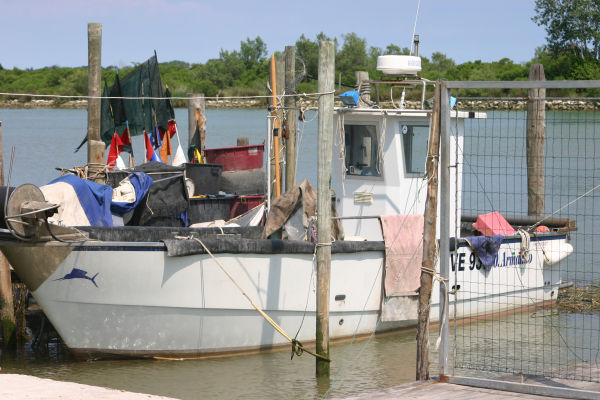

In [5]:
display(boat_image)

Créer un vecteur numpy (un tableau qui contient les valeurs des pixels) de l'image en utilisant la fonction np.array().

In [6]:
img_array = np.array(boat_image)

Afficher le type de ce vecteur, sa taille. Afficher le type des éléments du vecteur à l'aide de .dtype. Observer également l'output de .flags.writeable appliquée à cet objet.

In [7]:
print(type(img_array))
print(img_array.shape)
print(img_array.dtype)
print(img_array.flags.writeable)

<class 'numpy.ndarray'>
(400, 600, 3)
uint8
True


In [8]:
print(img_array)

[[[183 186 219]
  [182 187 219]
  [180 186 218]
  ...
  [ 62  73  56]
  [ 81  90  71]
  [ 60  69  50]]

 [[183 186 219]
  [182 187 219]
  [180 186 218]
  ...
  [ 52  65  48]
  [ 40  51  34]
  [ 58  67  48]]

 [[182 187 219]
  [182 187 219]
  [181 187 219]
  ...
  [ 43  55  41]
  [ 47  58  42]
  [ 56  67  50]]

 ...

 [[250 233 226]
  [251 234 227]
  [252 235 228]
  ...
  [138 138 138]
  [141 141 141]
  [139 139 139]]

 [[246 233 225]
  [247 234 226]
  [248 235 227]
  ...
  [150 150 150]
  [152 152 152]
  [150 150 150]]

 [[249 239 230]
  [249 239 230]
  [248 238 229]
  ...
  [138 138 138]
  [144 144 144]
  [143 143 143]]]


Vérifier qu'il est possible de modifier la valeur d'un élément du tableau. Au besoin, chercher sur internet comment modifier une valeur dans un tel tableau numpy.

In [9]:
img_array[0, 0, 0] = 0

In [10]:
img_array[0, 0, 0]

np.uint8(0)

In [11]:
img_array

array([[[  0, 186, 219],
        [182, 187, 219],
        [180, 186, 218],
        ...,
        [ 62,  73,  56],
        [ 81,  90,  71],
        [ 60,  69,  50]],

       [[183, 186, 219],
        [182, 187, 219],
        [180, 186, 218],
        ...,
        [ 52,  65,  48],
        [ 40,  51,  34],
        [ 58,  67,  48]],

       [[182, 187, 219],
        [182, 187, 219],
        [181, 187, 219],
        ...,
        [ 43,  55,  41],
        [ 47,  58,  42],
        [ 56,  67,  50]],

       ...,

       [[250, 233, 226],
        [251, 234, 227],
        [252, 235, 228],
        ...,
        [138, 138, 138],
        [141, 141, 141],
        [139, 139, 139]],

       [[246, 233, 225],
        [247, 234, 226],
        [248, 235, 227],
        ...,
        [150, 150, 150],
        [152, 152, 152],
        [150, 150, 150]],

       [[249, 239, 230],
        [249, 239, 230],
        [248, 238, 229],
        ...,
        [138, 138, 138],
        [144, 144, 144],
        [143, 143, 143]]

Nous avons donc généré un vecteur de classe numpy.ndarray, contenant des valeurs de type uint8, de 3 dimensions dont la forme est (hauteur, largeur, nombre de canaux (Rouge, Vert, Bleu)). Ce vecteur est modifiable (vous pouvez modifier les valeurs de chaque pixel).

Créer un tableau numpy grâce à la fonction np.asarray(). Vérifier que la taille et le type des valeurs sont cohérents, et si ce tableau est modifiable ou non.

In [12]:
img_asarray = np.asarray(boat_image)

In [26]:
print(type(img_asarray))
print(img_asarray.shape)
print(img_asarray.flags.writeable)


<class 'numpy.ndarray'>
(400, 600, 3)
False


Note : La fonction numpy.asarray de NumPy a commencé à renvoyer un objet non inscriptible (non-writeable) à partir de la version 1.17.0 de NumPy. Avant cette version, l'objet renvoyé était inscriptible (writeable) par défaut. Cette modification a été apportée pour améliorer la sécurité des données et éviter les problèmes potentiels liés à la modification involontaire des données. NumPy 1.17.0 a été publié le 21 juillet 2019. Selon votre version de numpy vous pourrez observer des comportements légèrement différents.

Si votre tableau n'est pas modifiable, vérifier qu'il est alors bien impossible d'affecter une valeur à un élément de ce tableau, en essayant une telle manipulation. Une erreur de type ValueError devrait être levée.

In [30]:
#img_asarray[0, 0, 0] = 0

Lorsque nous travaillons avec PIL uniquement, il est possible d'afficher les images grâce à la méthode show(). Ici, numpy est une bibliothèque de manipulations mathématiques plus larges. Un vecteur numpy n'est pas un objet dédié à la représentation d'images. Ainsi il ne dispose pas directement de méthode show().

En utilisant la fonction plt.imshow(), afficher l’image à partir du 1er vecteur numpy (modifiable). Le fonctionnement de plt est le suivant : on prépare notre visualisation à l'aide de fonctions de plt (ici, cette étape consiste à appeler plt.imshow() sur le vecteur numpy). Lorsque cette visualisation est prête, on l'affiche en appelant plt.show().

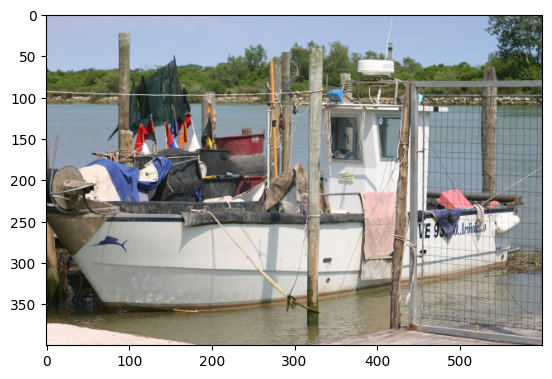

In [31]:
plt.imshow(img_array)
plt.show()

Vérifier que le 2nd vecteur numpy (non modifiable) permet également un affichage de l'image qu'il représente.

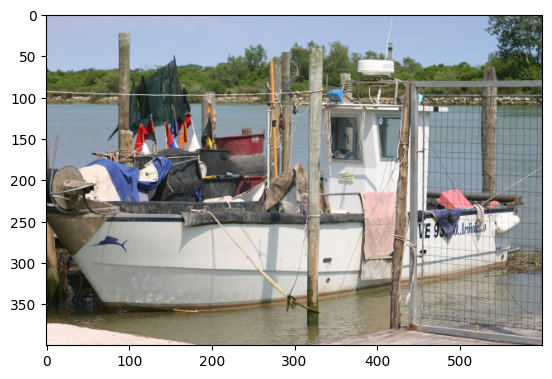

In [32]:
plt.imshow(img_asarray)
plt.show()

Dans cette partie, nous allons générer des images en utilisant numpy. C'est une alternative à la création en utilisant PIL que nous avons déjà vue. Pour représenter une image en mode RGB, il convient de créer un vecteur de 3 dimensions dont la première dimension est la hauteur, la seconde est la largeur et la troisième représente les canaux RGB (chaque canal est représenté par une valeur de type numpy uint8).

Créer un vecteur numpy de taille (100, 300, 3) dont les trois canaux de tous les pixels ont pour valeur 0. Vérifier que l'image représentée est bien une image entièrement noire.

In [35]:
hauteur = 100
largeur = 300

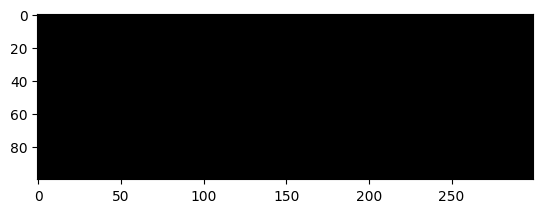

In [42]:
flag_array = np.zeros(shape=(hauteur, largeur, 3), dtype=np.uint8)
plt.imshow(flag_array)
plt.show()

Remplir ce vecteur avec des pixels de couleur rouge (rouge = 255, vert = 0, bleu = 0), vert (rouge = 0, vert = 255, bleu = 0) et bleu (rouge = 0, vert = 0, bleu = 255) en créant 3 bandes verticales de couleur unie de même largeur.

Souvenez-vous de la manière avec laquelle on accède à un élément donné du tableau. Pour accéder à une plage de valeurs plutôt qu'une seule valeur, on indique les valeurs de départ (inclus) et de fin (exclu) de la plage, en utilisant le caractère ":" pour les séparer. Ainsi, si v est un vecteur numpy à deux dimension, v[3:10, 2:4] permet d'accéder à la fenêtre de v contenant :
- toutes les lignes de la 4e à la 10e incluses (en se rappelant qu'en Python la numérotation commence à 0 et non 1),
- la troisième et la quatrième colonne.

In [ ]:
flag_array[:, :largeur//3, 0] = 255
# ou flag_array[:, :largeur//3] = (255, 0, 0)

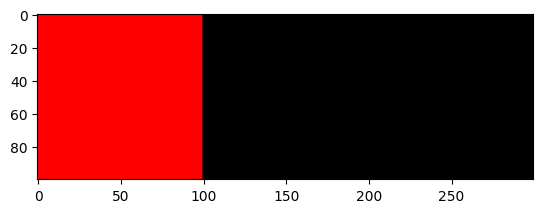

In [44]:
plt.imshow(flag_array)
plt.show()

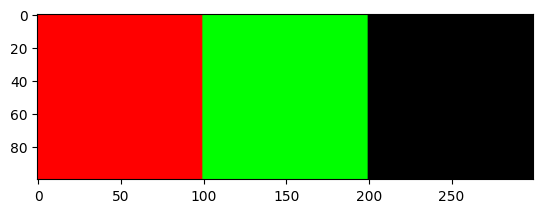

In [45]:
flag_array[:, largeur//3:(2*largeur)//3, 1] = 255
plt.imshow(flag_array)
plt.show()

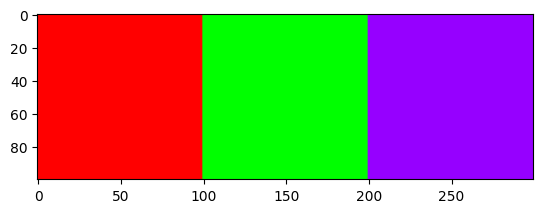

In [55]:
flag_array[:, (2*largeur)//3:, 2] = 255
plt.imshow(flag_array)
plt.show()

Pour créer une image en nuance de gris (mode "L"), il suffit de créer un vecteur à deux dimensions représentant la hauteur et la largeur de l’image (un tableau de taille h x l x 1 est un tableau de taille h x l). Il faut néanmoins ajouter le paramètre cmap='Greys_r' à plt.imshow() pour préciser que nous voulons afficher une image en nuance de gris.

Créer de cette manière une nouvelle image avec 3 bandes verticales unies de couleurs respectives noir, gris et blanc.

In [18]:
# Votre code ici

Il est possible de faire le chemin inverse et de créer une image PIL à partir d'un tableau numpy, en utilisant la méthode fromarray de la classe PIL Image. A noter que les éléments du tableau numpy doivent être bien typés comme des entiers (si ce n'est pas le cas, les convertir préalablement en entiers).

Créer une image PIL à partir de notre drapeau à 3 bandes colorés.

In [19]:
# Votre code ici

Enregistrer le résultat sous forme de fichier image avec la méthode save déjà vue. Vous pouvez utiliser l'extension de votre choix.

In [20]:
# Votre code ici

Revenons à l'image d'origine chargée dans notre dossier.

Nous allons afficher l'histogramme de notre image représentant la répartition des pixels selon leur intensité. Pour le moment, nous mélangeons les canaux de couleur. La fonction flatten() peut nous aider à transformer le vecteur numpy en un autre vecteur numpy avec une seule colonne.

Nous allons préparer l'histogramme en :
- découpant l'axe des abscisses en 20 sous-ensembles (pour créer un histogramme à 20 bandes),
- affichant les ordonnées en fréquence (entre 0 et 1) plutôt qu'en nombre de pixels,
- créant une bordure noire autour des bandes de l'histogramme,
- colorant les bandes en rouge (plutôt qu'en bleu qui est la couleur par défaut).

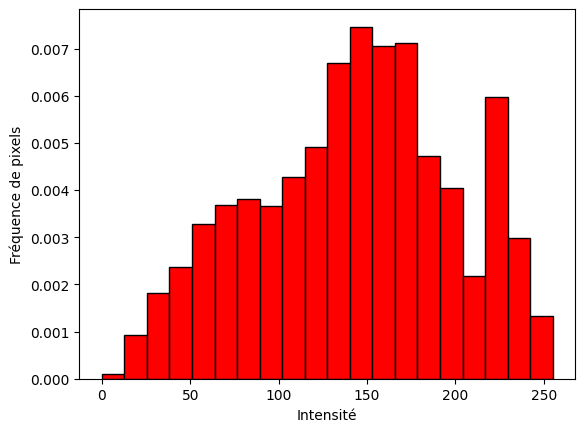

In [21]:
plt.hist(img_array.flatten(), bins=20, density=True, edgecolor="black", color="red")
plt.xlabel("Intensité")
plt.ylabel("Fréquence de pixels")
plt.show()

Le filtrage est un élément essentiel du traitement d'images. Dans cette partie, nous allons générer des filtres à partir de la bibliothèque PIL, créer des images filtrées et comparer les histogrammes des deux images (originale et filtrée).

Rajouter un import du module ImageFilter de PIL.

Utiliser la méthode filter (qui prend en paramètre le filtre à utiliser) pour générer une image avec le filtre ImageFilter.BLUR à partir de notre image d'origine. La stocker dans une nouvelle variable. Pour plus de documentation sur ImageFilter : https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html

In [22]:
img_blur = # Votre code ici

SyntaxError: invalid syntax (1931590275.py, line 1)

Essayons de comprendre comment ce filtre fonctionne.

A partir du travail déjà effectué, nous allons afficher sur la même figure plt les histogrammes superposés des pixels des deux images (en utilisant deux couleurs, par exemple rouge et bleu). Il est possible de jouer sur le paramètre alpha (transparence) de la fonction hist afin de bien visualiser les deux histogrammes.

In [ ]:
def plot_two_hists(
    origin_img_array: np.array,
    filtered_img_array: np.array,
    filter_name: str,
) -> None:
    plt.hist(
        origin_img_array,
        bins=20,
        density=True,
        alpha=0.5,
        edgecolor="black",
        color="red",
        label="Image originale",
    )
    plt.hist(
        filtered_img_array,
        bins=20,
        density=True,
        alpha=0.5,
        edgecolor="black",
        color="blue",
        label=f"Filtre {filter_name}",
    )
    plt.legend()
    plt.show()

plot_two_hists(
    origin_img_array=img_array.flatten(),
    filtered_img_array=np.array(img_blur).flatten(),
    filter_name="BLUR",
)

Générer une image avec le filtre CONTOUR.

In [ ]:
# Votre code ici

Afficher les histogrammes des deux images.

In [ ]:
# Votre code ici

Générer une image avec le filtre FIND_EDGES.

In [ ]:
# Votre code ici

Afficher à nouveau les 2 histogrammes.

In [ ]:
# Votre code ici

Utiliser la commande dir(ImageFilter) pour visualiser l'ensemble des filtres disponibles.

In [ ]:
# Votre code ici

Visualiser les effets du filtre SHARPEN ainsi que d'un supplémentaire au choix.

Bonus : Essayer de conjecturer comment fonctionne le filtre SHARPEN. 

In [ ]:
# Votre code ici

Les couleurs dans une image inversée sont les couleurs "négatives" des originales. Par exemple, un cercle noir sur fond blanc s'affiche en blanc sur fond noir.

Proposer une façon efficace de calculer les valeurs des pixels de l'image inversée à partir de celle de départ (sous la forme de numpy array). Calculer et afficher l'image inversée de notre image originale (dans une nouvelle variable). Attention à ne pas modifier l'image d'origine.

Bonus : effectuer ce calcul en utilisant le "broadcasting" de numpy.

In [ ]:
# Votre code ici

On se souvient qu'en mode RGB, chaque pixel de l'image est représenté par trois entiers. Pour diviser l'image en composantes de couleur distinctes et générer des images monochromes (un seul canal), il suffit de garder un seul canal (rouge, vert ou bleu) et mettre les deux autres valeurs à 0.

Créer un nouveau tableau numpy ne contenant que le canal rouge de l'image d'origine. Afficher l'image correspondante.

Pour sélectionner le bon canal, il sera peut-être nécessaire de se renseigner sur le slicing des tableaux numpy (rechercher par exemple "numpy array slicing" sur votre moteur de recherche préféré).

In [ ]:
# Votre code ici

Préparer les images correspondant aux canaux bleu et vert. Afficher les 3 canaux sur une même visualisation, côte à côte. La fonction concatenate de numpy permet de réaliser cela. Si besoin, consulter sa documentation pour voir comment spécifier selon quel "axe" se fait la concaténation (c'est un argument classique des objets de numpy et d'autres bibliothèques proches comme pandas).

In [ ]:
# Votre code ici

Il est désormais temps de transformer l'image en nuance de gris. Il existe plusieurs façons de le faire, mais une façon simple est de prendre la moyenne pondérée des valeurs RGB de l'image originale.

Ecrire une fonction permettant de générer une image en niveaux de gris à partir d'une image originale RGB (sous forme np.array) en pondérant chacun de ses trois canaux de couleur. L'appeler sur notre image en testant différentes configurations de poids pour visualiser leur effet sur l’image en nuance de gris générée.

In [ ]:
# Votre code ici

Terminons ce TP avec une segmentation de cette image (ne pas confondre la segmentation d'une image donnée avec un problème de segmentation d'images en Machine Learning). Ici, le but est d'étiqueter chaque pixel de l'image avec une classe d'un référentiel donné. Une segmentation classique consiste à découper l’image en deux régions correspondant respectivement au premier plan et à l'arrière-plan. Ce cas correspond à un problème de binarisation.

Il existe une multitude de techniques pour réaliser une binarisation. Dans tous les cas, l'image est convertie en un seul canal (principalement en niveaux de gris) par comparaison de la valeur des pixels à un seuil (qui peut être défini globalement ou localement). Les pixels dont la valeur est supérieure au seuil sont traités comme appartenant à la première région, et les pixels dont la valeur est inférieure au seuil, à la seconde région.

En rappelant bien que la manière dont doit être choisi le seuil sera spécifique à l'application voire même à l'image, générer, à partir de l'image précédente en niveaux de gris, un vecteur numpy contenant des éléments booléens valant True si la valeur de l'intensité des pixels est supérieure à un seuil de 180, False sinon.

In [ ]:
# Votre code ici

En sachant que imshow comprend directement que nous sommes en convention float du support de cours lorsque sont fournies des valeurs booléennes (True correspond à 1, qui est compris comme 1.0 en représentation float et donc 255 en représentation 8bits), afficher l'image binarisée.

In [ ]:
# Votre code ici

Sur une image réelle, une telle binarisation peut s'avérer peu convaincainte. En pratique, des méthodes plus précises sont utilisées (par exemple Niblack ou Sauvola).

### Exercice 1

Générer une image d’un échiquier en noir et blanc de taille 200 x 200 avec numpy. Pour rappel, un échiquier contient 8 lignes et 8 colonnes et la case en bas à droite est blanche (et 200 est divisible par 8). (Repartir de zéro, y compris pour les imports.)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Votre code ici

### Exercice 2

- Trouver sur internet comment récupérer l'image astronaut de scikit-image sous forme d'image PIL (il faudra peut-être installer une nouvelle bibliothèque).
- Générer trois images monochromes correspondant à chacun des trois canaux RGB et les afficher.
- Pour chaque image monochrome, effectuer une segmentation binaire avec trois seuils : [100, 150, 200].
- Concaténer les images et afficher le résultat.

Contrainte bonus 1 : chaque visualisation correspondant à un tiret devra être effectuée dans une même figure plt, en utilisant plt.subplots.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

In [ ]:
# Votre code ici